In [14]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [16]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Univariate Analysis

<BarContainer object of 10000 artists>

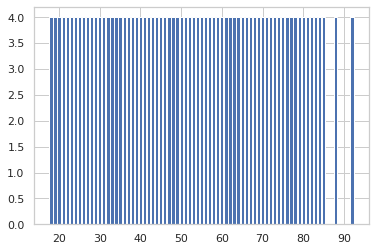

In [57]:
plt.bar (df['Age'],4)

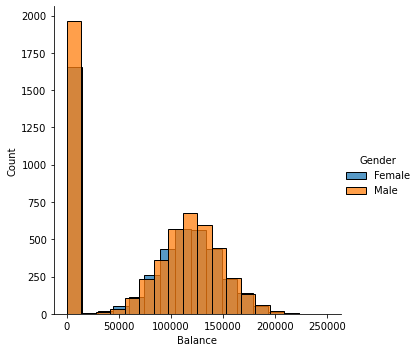

In [17]:
sns.FacetGrid(df,hue = "Gender", height= 5).map(sns.histplot,"Balance").add_legend()

Bivariate analysis
Box plot


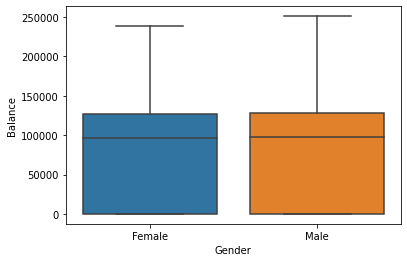

In [18]:
sns.boxplot(x="Gender",y="Balance",data=df)
plt.show()

Violinplot

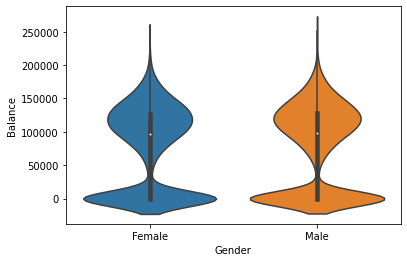

In [19]:
sns.violinplot(x="Gender",y="Balance",data=df)
plt.show()

Multivariate analysis

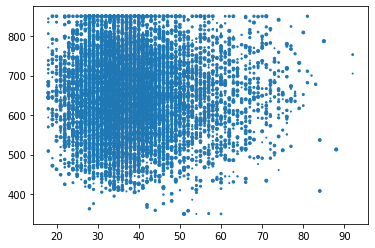

In [20]:
plt.scatter(df['Age'],df['CreditScore'],df['Tenure'])

In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [22]:
average = df['Balance'].mean()
print(average)

med = df['Balance'].median()
print(med)

76485.889288
97198.54000000001


In [23]:
standard_deviation = df['Balance'].std()
print(standard_deviation)

62397.405202385955


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


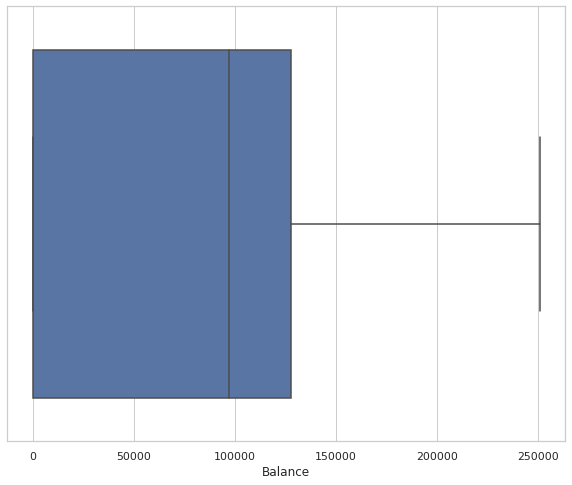

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Balance', data=df, orient="v")

<Figure size 1008x576 with 0 Axes>

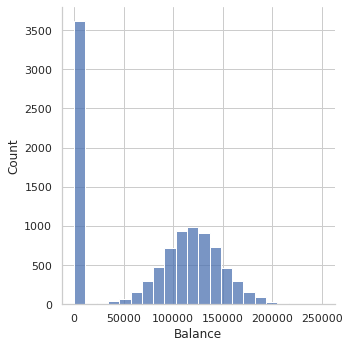

In [25]:
filter_data = df.dropna(subset=['Balance'])
plt.figure(figsize=(14,8))
sns.displot(filter_data['Balance'], kde=False)

Checking for missing values using isnull()

In [26]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Checking for missing values using notnull()

In [27]:
df.notnull().sum()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [28]:
# making data frame from csv file
data = pd.read_csv("Churn_Modelling.csv")
   
# creating bool series True for NaN values
bool_series = pd.isnull(data["Gender"])
   
# filtering data
# displaying data only with Gender = NaN
data[bool_series]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [29]:
# creating bool series True for NaN values
bool_series = pd.notnull(data["Gender"])
   
# filtering data
# displaying data only with Gender = Not NaN
data[bool_series]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Filling missing values using fillna(), replace() and interpolate()

In [30]:
df.fillna(0).sum()

RowNumber                                                   50005000
CustomerId                                              156909405694
Surname            HargraveHillOnioBoniMitchellChuBartlettObinnaH...
CreditScore                                                  6505288
Geography          FranceSpainFranceFranceSpainSpainFranceGermany...
Gender             FemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMa...
Age                                                           389218
Tenure                                                         50128
Balance                                                 764858892.88
NumOfProducts                                                  15302
HasCrCard                                                       7055
IsActiveMember                                                  5151
EstimatedSalary                                        1000902398.81
Exited                                                          2037
dtype: object

Find the outliers and replace the outliers

In [31]:

# Position of the Outlier
print(np.where(df['Balance']>10))

(array([   1,    2,    4, ..., 9996, 9998, 9999]),)


In [32]:
''' Detection '''
# IQR
Q1 = np.percentile(df['Balance'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Balance'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['Balance'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Balance'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (10000, 14)
New Shape:  (10000, 14)


Check for Categorical columns and perform encoding

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
label_encoder = LabelEncoder()

In [35]:
le = LabelEncoder()

In [36]:
df['Geography'] = le.fit_transform(df['Geography'])

In [37]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 1.4+ MB


In [39]:
data['Gender']=data['Gender'].replace(['Male','Female'],[0,1])

In [40]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


In [41]:
# Split data (independent & dependent variables)

x=data.iloc[:,0:13]
y=data['Exited']

In [42]:
x

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,0,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,Johnstone,516,France,0,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,Liu,709,France,1,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,Sabbatini,772,Germany,0,42,3,75075.31,2,1,0,92888.52


In [43]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

Scale the independent variables

In [44]:
from sklearn.preprocessing import scale

In [45]:
scale(y)

array([ 1.97716468, -0.50577476,  1.97716468, ...,  1.97716468,
        1.97716468, -0.50577476])

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# Split data (train & test data)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [49]:
x_train

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1817,1818,15804075,Chuang,628,Germany,1,36,3,91286.51,1,1,0,63085.94
1296,1297,15803365,Coffee,653,Spain,0,55,2,70263.83,1,0,1,62347.71
77,78,15662085,Read,678,France,1,32,9,0.00,1,1,1,148210.64
758,759,15647099,Ts'ui,633,France,1,37,9,156091.97,1,1,0,72008.61
346,347,15658935,Freeman,630,Germany,1,34,9,106937.05,2,1,0,138275.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3506,3507,15806511,Berry,445,Spain,0,45,10,0.00,2,0,1,90977.48
8777,8778,15723064,Kistler,603,Spain,0,24,1,165149.13,2,1,0,21858.28
5966,5967,15600832,Moss,508,France,1,43,9,0.00,1,1,0,103726.71
1708,1709,15772892,Robertson,699,France,1,49,2,0.00,1,0,0,105760.01


In [50]:
x_train.shape

(8000, 13)

In [51]:
y_train

1817    0
1296    0
77      0
758     0
346     0
       ..
3506    0
8777    0
5966    0
1708    0
9564    0
Name: Exited, Length: 8000, dtype: int64

In [52]:
y_train.shape

(8000,)

In [53]:
x_test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
49,50,15771873,Buccho,776,Germany,1,37,2,103769.22,2,1,0,194099.12
6045,6046,15784594,Mazzi,549,Germany,1,37,1,130622.34,2,1,1,128499.94
3447,3448,15612092,Palmer,646,Germany,0,32,8,105397.80,1,1,0,78111.84
6848,6849,15634628,Brown,579,France,1,33,1,65667.79,2,0,0,164608.98
7766,7767,15647259,Barnett,643,Spain,0,35,2,0.00,2,0,0,67979.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9040,9041,15653952,T'an,581,Germany,1,38,3,135157.05,1,1,1,32919.42
9675,9676,15638621,Simmons,735,Spain,0,39,1,60374.98,1,1,0,40223.74
1317,1318,15720702,Shih,789,France,0,37,3,0.00,1,1,0,121883.87
6916,6917,15588235,Vasilieva,654,France,1,24,8,145081.73,1,1,1,130075.07


In [54]:
x_test.shape

(2000, 13)

In [55]:
y_test

49      0
6045    0
3447    1
6848    0
7766    0
       ..
9040    0
9675    0
1317    1
6916    0
2085    0
Name: Exited, Length: 2000, dtype: int64

In [56]:
y_test.shape

(2000,)